# (Incomplete) Research Question: Does having a Master's or some other doctorate impact alumni engagement?

## To-Do

In [89]:
'''
- Add proper description (docstrings, comments, etc.) to the alumni_statistics_by_major_data_constructor() function
- Use the alumni_statistics_by_major_data_constructor() function to create the "Number of Events Attended Per Degree" and "Number of Individuals Per Degree" columns in temp_df
- See how the graphical outputs change as a result of the above
''';

## Imports

In [1]:
!pip install --quiet seaborn
!pip install --quiet tabulate
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Tuple
from collections import defaultdict
import tabulate
from IPython.display import display, HTML

## Initialize DataFrames

In [2]:
%cd /Users/OscarBarnes/Downloads/'Summer Employment 2024'/'CSV Downloads'

/Users/OscarBarnes/Downloads/Summer Employment 2024/CSV Downloads


In [3]:
!pwd

/Users/OscarBarnes/Downloads/Summer Employment 2024/CSV Downloads


In [4]:
!ls

Alumni_Masters_Research.csv Degree_Labels.csv


In [5]:
alumni_df = pd.read_csv("Alumni_Masters_Research.csv")
degree_labels_df = pd.read_csv("Degree_Labels.csv")

In [6]:
%cd /Users/OscarBarnes/Python/Pinewood_Work

/Users/OscarBarnes/Python/Pinewood_Work


In [7]:
!pwd

/Users/OscarBarnes/Python/Pinewood_Work


In [8]:
alumni_df.head()

,Person ID,Full Name,Degree/Certification,Individual Event Count
0,8460,"Aberg, Navid",BS,2.0
1,8413,"Aberg, Tina",BS,NaN
2,7726,"Abrams, Rob",MS,NaN
3,826,"Adem, Kayla",MS,NaN
4,901,"Advani, Niharika",<None>,NaN


## Data Pre-Processing

In [9]:
'''Purpose: Fill/remove NaN values, set dtypes, etc.''';

In [10]:
# Creating a list of all degrees; will use when setting the categories of the Degree/Certification column

degree_labels_df_list = []
for row in degree_labels_df["Degree/Certification"]:
    degree_labels_df_list.append(row)

degree_labels_df_list = list(set(degree_labels_df_list))

In [11]:
# Dealing w/ NA values
# We want to fill any NA values in the "Individual Event Count" column with 0
alumni_df.fillna({"Individual Event Count": 0}, inplace=True)
alumni_df["Individual Event Count"] = alumni_df["Individual Event Count"].astype("int")

# We want to remove any rows for which we don't have any associated degree
rows_to_remove = list(alumni_df.loc[alumni_df["Degree/Certification"].isin(["<None>", "NaN"])].index.to_numpy())
result = pd.isna(alumni_df)

for index, row in result.iterrows():
    if row.iloc[2] == True:
        rows_to_remove.append(row.name)

alumni_df = alumni_df.drop(rows_to_remove)
print("Size of DataFrame:", len(alumni_df))

Size of DataFrame: 863


In [12]:
# Setting the dtype of the Degree/Certification column to category
alumni_df["Degree/Certification"] = alumni_df["Degree/Certification"].astype("category")
alumni_df["Degree/Certification"] = alumni_df["Degree/Certification"].cat.set_categories(degree_labels_df_list)
alumni_df["Degree/Certification"].value_counts()

Degree/Certification
BA                271
BS                206
MS                 86
MBA                62
MA                 52
JD                 37
PhD                35
MD                 22
Prof. Cert.        10
MFA                 7
ME                  7
MEd                 6
BFA                 6
BBA                 5
Other               4
PhD do not use      4
MPA                 3
DPT                 3
MSW                 3
AA                  3
MPH                 3
LL.M                2
DVM                 2
MPP                 2
AAS                 2
PharmD              2
BComm               1
MSEd                1
DNP                 1
DPM                 1
OD                  1
PsyD                1
EdD                 1
MBT                 1
BVMS                1
BTM                 1
MSEE                1
DDS                 1
MM                  1
M.Phil              1
BE                  1
MSA                 1
MSJ                 1
MCP                 1
BEd        

In [13]:
# Miscellaneous work
alumni_df["Person ID"] = alumni_df["Person ID"].astype("int")
alumni_df["Full Name"] = alumni_df["Full Name"].astype("str"); # This is already done by default; Note: For pandas DataFrames, there is no dtype "string", only "object"

In [14]:
# Reset DataFrame index
alumni_df.reset_index(drop=True, inplace=True)
alumni_df.head()

,Person ID,Full Name,Degree/Certification,Individual Event Count
0,8460,"Aberg, Navid",BS,2
1,8413,"Aberg, Tina",BS,0
2,7726,"Abrams, Rob",MS,0
3,826,"Adem, Kayla",MS,0
4,8596,"Advani, Priyanka",BA,0


## Grouping and Other Operations

In [15]:
'''Section Purpose: Before plotting anything, use this section to do any groupby's, sorting, etc.''';

In [16]:
# List of all degrees
alumni_df["Degree/Certification"].cat.categories

Index(['JD', 'MSEE', 'BFA', 'BEd', 'ScD', 'MD', 'MSA', 'BE', 'MSCM', 'BS',
       'Other', 'BVMS', 'Prof. Cert.', 'BBA', 'MBA', 'BM', 'MPP', 'MPH', 'DDS',
       'MM', 'MPA', 'LL.M', 'M.Phil', 'ME', 'BTM', 'BA', 'PharmD', 'MSJ',
       'DPT', 'AS', 'AAS', 'MCP', 'MA', 'MS', 'DNP', 'SM', 'AA', 'GradDipSci',
       'EdD', 'PsyD', 'OD', 'DVM', 'PhD', 'MSW', 'DPM', '<None>', 'MFA',
       'MSEd', 'BComm', 'GED', 'PhD do not use', 'MBT', 'MEd'],
      dtype='object')

In [17]:
# List corresponding to Bachelor's/Associate's degrees
bachelor_list = ['AAS', 'BA','BTM', 'AA', 'BE','BS','GED','Prof. Cert.','BEd','BComm','Other','BBA','AS','BVMS','BFA','BM',]

# List corresponding to Master's/PhD's degrees
master_list = ['DPM', 'PhD', 'EdD', 'MPA', 'ScD', 'SM','MA','MCP','MSCM', 'MS', 'MBA', 'DPT', 'MBT', 'MSA', 'M.Phil', 'MPH','MFA','MD','MPP','DNP','PsyD','PharmD','LL.M','JD','ME','MM','MSEd','MEd','MSW','GradDipSci','OD','DVM','DDS','MSJ','MSEE',]

In [18]:
# For the specified list of degrees, this function returns the total number of events attended for those relevant individuals, the average number of individual events
# attended per relevant individual, and the total number of relevant individuals.

def alumni_engagement_statistics(df : pd.DataFrame, degree_list : list, override_list : list, row_degree_index : int = 2, row_event_index : int = 3, person_index : int = 0) -> Tuple[int, float, int]:
    '''
    This function returns the total number of events attended by alumni associated with a particular degree or set of degrees, alongside a 
    mean statistic and the total number of individuals associated who have the searched-for degrees.

    Inputs:
        df - This is the DataFrame you want to search through.
        
        degree_list - List of degrees. If an individual's degree matches any degree listed in degree_list, this person will be counted.
        
        override_list - Imagine somebody has both a Bachelor's and Master's degree listed in the DataFrame (on separate rows), but we only want to count a person if they only have a Bachelor's degree. 
        To deal with this issue, pass in your list of Master's degrees as the override_list. If you don't need an override_list, simply pass in an empty list.
        
        row_degree_index - After applying the .iterrows() method, this is the index corresponding to the column which contains degree information. For alumni_df, this corresponds to 2.
        
        row_event_index - After applying the .iterrows() method, this is the index corresponding to the column that contains the individual event count information. For alumni_df, this corresponds to 3.
        
        person_index - After applying the .iterrows() method, this is the index corresponding to the column that contains an individual's Person ID. For alumni_df, this corresponds to 0.
    '''
    # These are the values we will be computing our relevant statistics from.
    temp_dict_values = {}
    # This dict is to ensure that nobody who has a degree in the 'override_list' has their info added to temp_dict_values.
    temp_dict_check_override_list = {}
    # This dict is to avoid double-checking; in certain instances, somebody might have multiple degrees in the 'degree_list' spread over multiple rows, and we don't need to check them all. 
    temp_dict_check_degree_list = {}
    
    for _, row in df.iterrows():
        if any(degree in row.iloc[row_degree_index] for degree in degree_list) or any(degree in row.iloc[row_degree_index] for degree in override_list):
            if any(degree in row.iloc[row_degree_index] for degree in override_list):
                if str(row.iloc[person_index]) in temp_dict_values:
                    temp_dict_values.pop(str(row.iloc[person_index]))
                    temp_dict_check_override_list[str(row.iloc[person_index])] = str(row.iloc[person_index])
            else:
                if str(row.iloc[person_index]) not in temp_dict_check_override_list:
                    if str(row.iloc[person_index]) not in temp_dict_check_degree_list:
                        temp_dict_values[str(row.iloc[person_index])] = row.iloc[row_event_index]
                        temp_dict_check_degree_list[str(row.iloc[person_index])] = str(row.iloc[person_index])

    output = (int(sum(temp_dict_values.values())), sum(temp_dict_values.values()) / len(temp_dict_values), int(len(temp_dict_values)))

    del temp_dict_values, temp_dict_check_override_list, temp_dict_check_degree_list
    
    return output

In [19]:
# Table displaying our results

entry_1, entry_2 = alumni_engagement_statistics(alumni_df, bachelor_list, master_list), alumni_engagement_statistics(alumni_df, master_list, [])

table = [["Bachelors Info", *entry_1], ["Masters Info", *entry_2]]
display_table = display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["Degree Type", "Number of Events Attended", "Number of Events Attended Per Person", "Number of Persons"])))

display_table

Degree Type,Number of Events Attended,Number of Events Attended Per Person,Number of Persons
Bachelors Info,358,0.761702,470
Masters Info,245,0.77044,318


In [20]:
'''In the following section, we prepare a temporary dataframe for use in producing graphs.''';

In [26]:
temp_df = alumni_df.groupby("Degree/Certification", observed=False)[["Individual Event Count"]].sum()
temp_df

,Individual Event Count
Degree/Certification,
JD,15
MSEE,0
BFA,1
BEd,0
ScD,0
MD,17
MSA,0
BE,2
MSCM,0


In [27]:
alumni_df

,Person ID,Full Name,Degree/Certification,Individual Event Count
0,8460,"Aberg, Navid",BS,2
1,8413,"Aberg, Tina",BS,0
2,7726,"Abrams, Rob",MS,0
3,826,"Adem, Kayla",MS,0
4,8596,"Advani, Priyanka",BA,0
...,...,...,...,...
858,8014,"Zislis, Benjamin",BA,0
859,7941,"Zislis, Dan",BA,1
860,824,"Zouzounis, Miriam",BA,0
861,924,"Zucker, Amanda",BS,0


In [90]:
# [ADD HERE]; in short, this func can be used to create the "Number of Events Attended Per Degree" (true_count = False) and "Number of Individuals Per Degree" (true_count = True) columns in temp_df
def alumni_statistics_by_major_data_constructor(df : pd.DataFrame, degree_list : list, override_list : list, event_index : int = 3, degree_index : int = 2, person_index : int = 0, true_count : bool = False) -> defaultdict(int):
    '''
    [ADD HERE]
    '''
    temp_dict_values = defaultdict(int)
    temp_dict_check_override_list = defaultdict(list)
    temp_dict_reference_info_list = defaultdict(list)
    temp_dict_person_degrees_list = defaultdict(list)
    
    for _, row in df.iterrows():
        if any(degree == str(row.iloc[degree_index]) for degree in degree_list) or any(degree == str(row.iloc[degree_index]) for degree in override_list):
            temp_dict_person_degrees_list[str(row.iloc[person_index])].append(str(row.iloc[degree_index]))
            if any(degree == str(row.iloc[degree_index]) for degree in override_list):
                if str(row.iloc[person_index]) not in list(temp_dict_check_override_list.keys()):
                    temp_dict_check_override_list[str(row.iloc[person_index])].append([str(row.iloc[person_index]), str(row.iloc[degree_index]),row.iloc[event_index]])
                continue
            else:
                if str(row.iloc[person_index]) not in list(temp_dict_check_override_list.keys()):
                    temp_dict_reference_info_list[str(row.iloc[person_index])].append([str(row.iloc[person_index]), str(row.iloc[degree_index]), row.iloc[event_index]])
                    if true_count:
                        temp_dict_values[str(row.iloc[degree_index])] += 1
                    else:
                        temp_dict_values[str(row.iloc[degree_index])] += row.iloc[event_index]

    # [ADD HERE]
    temp_dict_degree_count_list = defaultdict(list)
    temp_dict_degree_count_list_helper = defaultdict(list)

    if true_count:
        for person_id, degrees in temp_dict_person_degrees_list.items():
            if any(degree == degrees for degree in degree_list):
                for degree in degrees:
                    if any(d == degree for d in override_list):
                        for degree in temp_dict_degree_count_list_helper[person_id]: 
                            temp_dict_degree_count_list[person_id].append(degree)
                        for degree in temp_dict_degree_count_list[person_id]:
                            temp_dict_values[degree] -= 1
                        temp_dict_degree_count_list_helper[person_id].clear()
                        temp_dict_degree_count_list[person_id].clear()
                        break
                    temp_dict_degree_count_list_helper[person_id].append(degree)
                temp_dict_degree_count_list_helper[person_id].clear()
                temp_dict_degree_count_list[person_id].clear()
    else:
        for person_id, degrees in temp_dict_person_degrees_list.items():
            if any(degree == degrees for degree in degree_list):
                for degree in degrees:
                    if any(d == degree for d in override_list):
                        for degree, count in temp_dict_degree_count_list_helper[person_id]: 
                            temp_dict_degree_count_list[person_id].append((degree, count))
                        for degree, count in temp_dict_degree_count_list[person_id]:
                            temp_dict_values[degree] -= count
                        temp_dict_degree_count_list_helper[person_id].clear()
                        temp_dict_degree_count_list[person_id].clear()
                        break
                    if temp_dict_reference_info_list[person_id][0] is None:
                        temp_dict_degree_count_list_helper[person_id].append((degree, temp_dict_check_override_list[person_id][0][2]))
                    else:
                        for items in temp_dict_reference_info_list[person_id]:
                            if items[1] == degree: 
                                temp_dict_degree_count_list_helper[person_id].append((degree, items[2]))
                temp_dict_degree_count_list_helper[person_id].clear()
                temp_dict_degree_count_list[person_id].clear()

    # [ADD HERE]
    for degree in degree_list:
        if not any(d == degree for d in temp_dict_values.keys()):
            temp_dict_values[degree] += 0
    
    del temp_dict_check_override_list, temp_dict_reference_info_list, temp_dict_person_degrees_list, temp_dict_degree_count_list, temp_dict_degree_count_list_helper

    return temp_dict_values

In [84]:
# Setting up our temp_df to work with
temp_df = alumni_df.groupby("Degree/Certification", observed=False)[["Individual Event Count"]].sum()
temp_df = temp_df.sort_values(by="Degree/Certification", ascending=True)
temp_df.reset_index(inplace=True)
temp_df = temp_df.rename(columns={"Degree/Certification": "Degree/Certification", "Individual Event Count": "Number of Events Attended Per Degree"});
temp_df["Number of Events Attended Per Degree"] = temp_df["Number of Events Attended Per Degree"].astype("int")

# Finally, we want to add a column indicating whether the degree is in bachelor_list, master_list, or neither
temp_df["B/M/O"] = ['Test' for _ in range(len(temp_df))]

# Re-instating the lists
bachelor_list = ['AAS', 'BA','BTM', 'AA', 'BE','BS','GED','Prof. Cert.','BEd','BComm','Other','BBA','AS','BVMS','BFA','BM',]
master_list = ['DPM', 'PhD', 'EdD', 'MPA', 'ScD', 'SM','MA','MCP','MSCM', 'MS', 'MBA', 'DPT', 'MBT', 'MSA', 'M.Phil', 'MPH','MFA','MD','MPP','DNP','PsyD','PharmD','LL.M','JD','ME','MM','MSEd','MEd','MSW','GradDipSci','OD','DVM','DDS','MSJ','MSEE',]

for _, row in temp_df.iterrows():
    get_degree = str(row.iloc[0])
    if any(degree in get_degree for degree in bachelor_list):
        temp_df.loc[row.name, "B/M/O"] = "Bachelors Type"
    elif any(degree in get_degree for degree in master_list):
        temp_df.loc[row.name, "B/M/O"] = "Masters Type"
    else:
        temp_df.loc[row.name, "B/M/O"] = "Miscellaneous Type"

# Re-ordering table
temp_df = temp_df.iloc[:, [2,0,1]]

# Output
temp_df

,B/M/O,Degree/Certification,Number of Events Attended Per Degree
0,Bachelors Type,BE,2
1,Masters Type,ME,6
2,Bachelors Type,Prof. Cert.,5
3,Bachelors Type,GED,0
4,Masters Type,MBT,0
5,Masters Type,MS,71
6,Masters Type,LL.M,2
7,Masters Type,DPT,6
8,Masters Type,PharmD,1
9,Masters Type,DDS,0


In [85]:
degree_list = alumni_df["Degree/Certification"].cat.categories.to_list()

# For each degree, we append a list of the Person IDs associated with all individuals which have that degree
degree_individual_id_list = defaultdict(list, {key:[] for key in degree_list})
    # Could honestly skip this part, just wanted to get this info in case it's useful later

for _, row in alumni_df.iterrows():
    assert any(degree in str(row.iloc[2]) for degree in degree_list)
    
    degree_individual_id_list[str(row.iloc[2])].append(int(row.iloc[0]))

# Now, we count the number of individuals per degree type 
degree_individual_count = {}
for key, value in degree_individual_id_list.items():
    degree_individual_count[str(key)] = len(value)

# Output
degree_individual_count

{'BE': 1,
 'ME': 7,
 'Prof. Cert.': 10,
 'GED': 0,
 'MBT': 1,
 'MS': 86,
 'LL.M': 2,
 'DPT': 3,
 'PharmD': 2,
 'DDS': 1,
 'AAS': 2,
 'AA': 3,
 'MSW': 3,
 'BEd': 0,
 'MA': 52,
 'MSA': 1,
 'EdD': 1,
 '<None>': 0,
 'MFA': 7,
 'BS': 206,
 'MSCM': 0,
 'MCP': 1,
 'DNP': 1,
 'PsyD': 1,
 'MPP': 2,
 'MBA': 62,
 'AS': 0,
 'PhD do not use': 4,
 'MD': 22,
 'MM': 1,
 'BTM': 1,
 'Other': 4,
 'MPH': 3,
 'DVM': 2,
 'DPM': 1,
 'OD': 1,
 'BComm': 1,
 'BM': 0,
 'JD': 37,
 'PhD': 35,
 'ScD': 0,
 'BBA': 5,
 'MEd': 6,
 'M.Phil': 1,
 'BA': 271,
 'MPA': 3,
 'SM': 0,
 'BVMS': 1,
 'MSEd': 1,
 'BFA': 6,
 'MSJ': 1,
 'MSEE': 1,
 'GradDipSci': 0}

In [86]:
# Initializing the column we want to fill with values
temp_df["Number of Individuals Per Degree"] = [0 for _ in range(len(temp_df))]

for _, row in temp_df.iterrows():
    get_degree = str(row.iloc[1])
    temp_df.loc[row.name, "Number of Individuals Per Degree"] = degree_individual_count[get_degree]

temp_df["Number of Individuals Per Degree"] = temp_df["Number of Individuals Per Degree"].astype("int")

# Output
temp_df

,B/M/O,Degree/Certification,Number of Events Attended Per Degree,Number of Individuals Per Degree
0,Bachelors Type,BE,2,1
1,Masters Type,ME,6,7
2,Bachelors Type,Prof. Cert.,5,10
3,Bachelors Type,GED,0,0
4,Masters Type,MBT,0,1
5,Masters Type,MS,71,86
6,Masters Type,LL.M,2,2
7,Masters Type,DPT,6,3
8,Masters Type,PharmD,1,2
9,Masters Type,DDS,0,1


## Graphical Outputs

<Axes: xlabel='Number of Events Attended Per Degree', ylabel='B/M/O'>

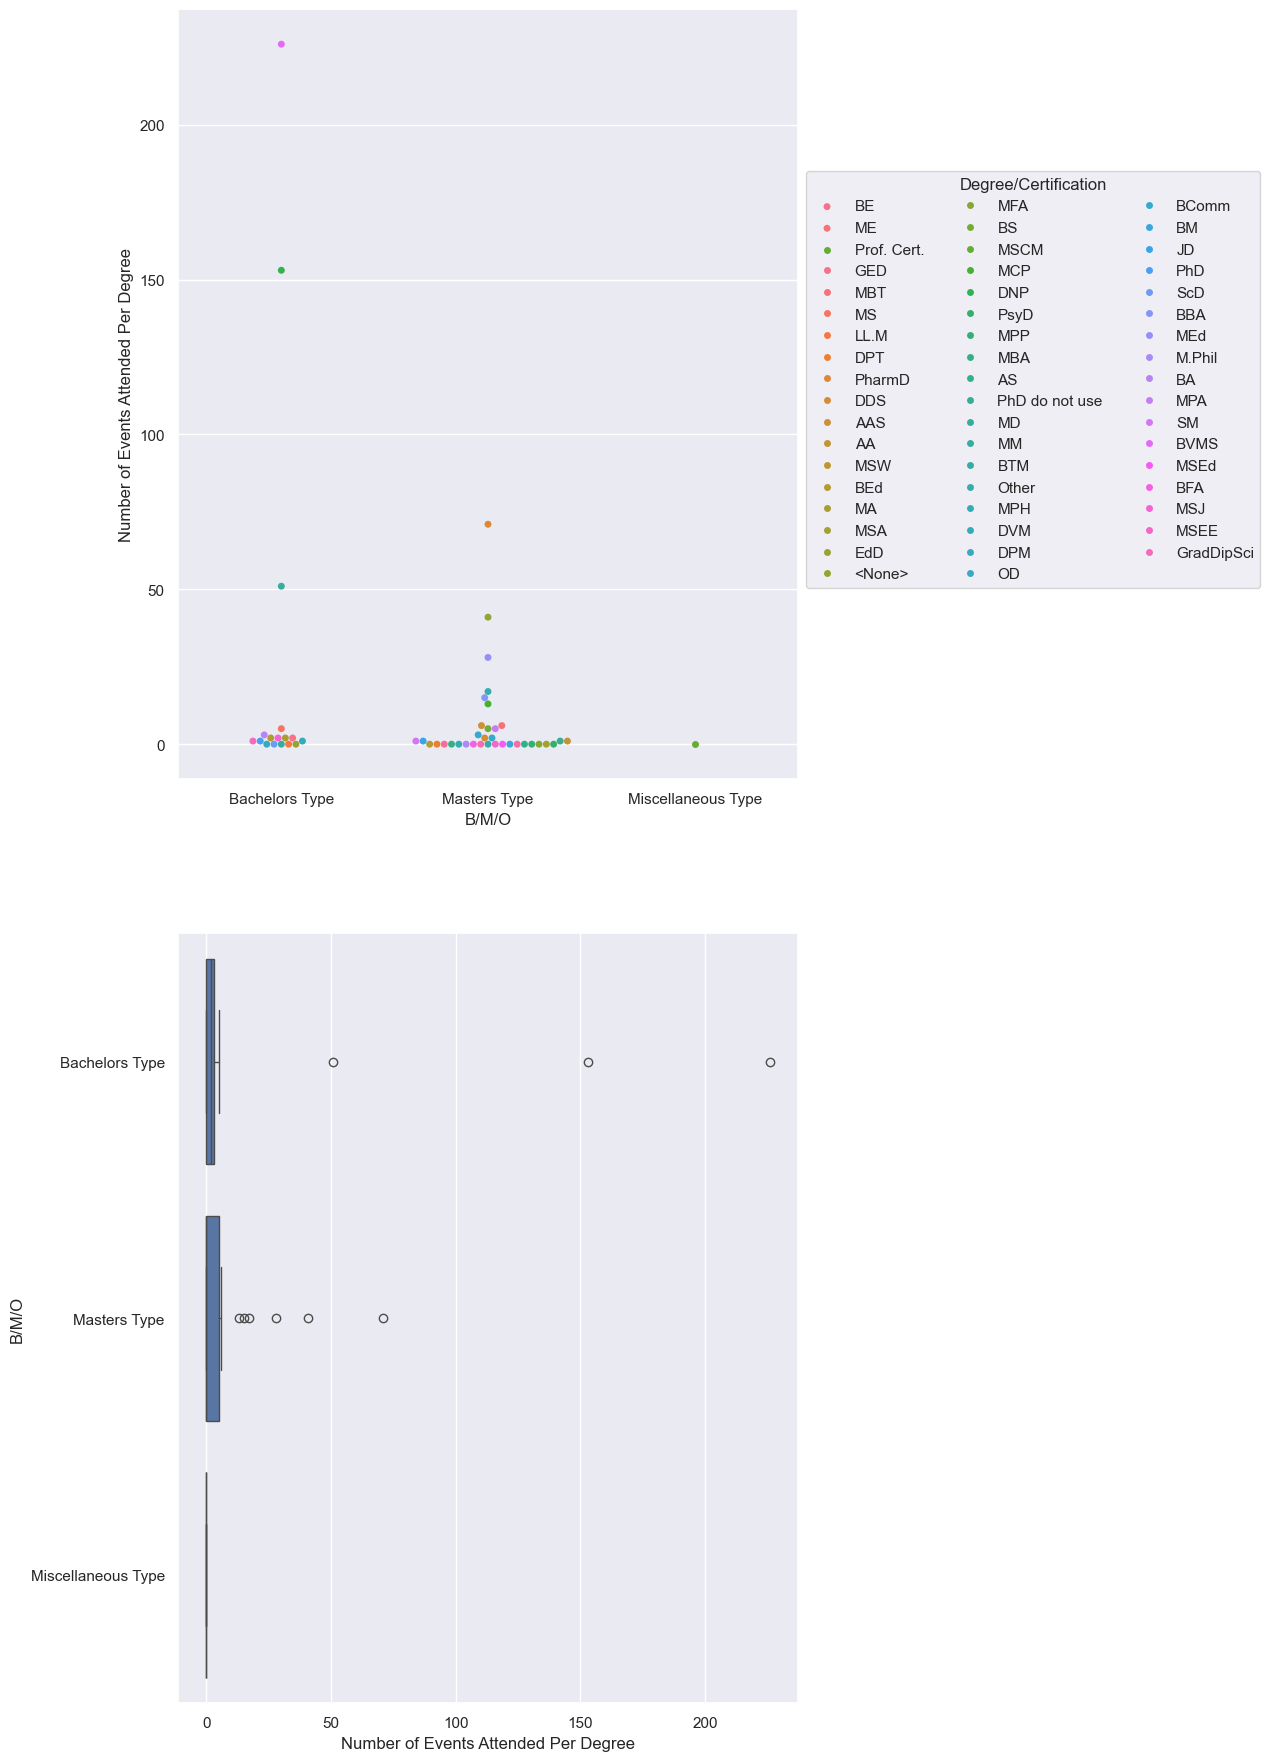

In [87]:
# Number of Events Attended Per Degree as a Function of B/M/O
sns.set_theme()

fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(8, 22))

# Swarmplot
sns.swarmplot(data=temp_df, x="B/M/O", y="Number of Events Attended Per Degree", hue="Degree/Certification", ax = axes[0])

axes[0].legend_.remove()
axes[0].legend(title = "Degree/Certification", labels = [_ for _ in degree_list], ncols=3, bbox_to_anchor=(1, 0.8))

# Boxplot
sns.boxplot(temp_df, x = "Number of Events Attended Per Degree", y = "B/M/O", ax = axes[1])

<Axes: xlabel='Number of Individuals Per Degree', ylabel='B/M/O'>

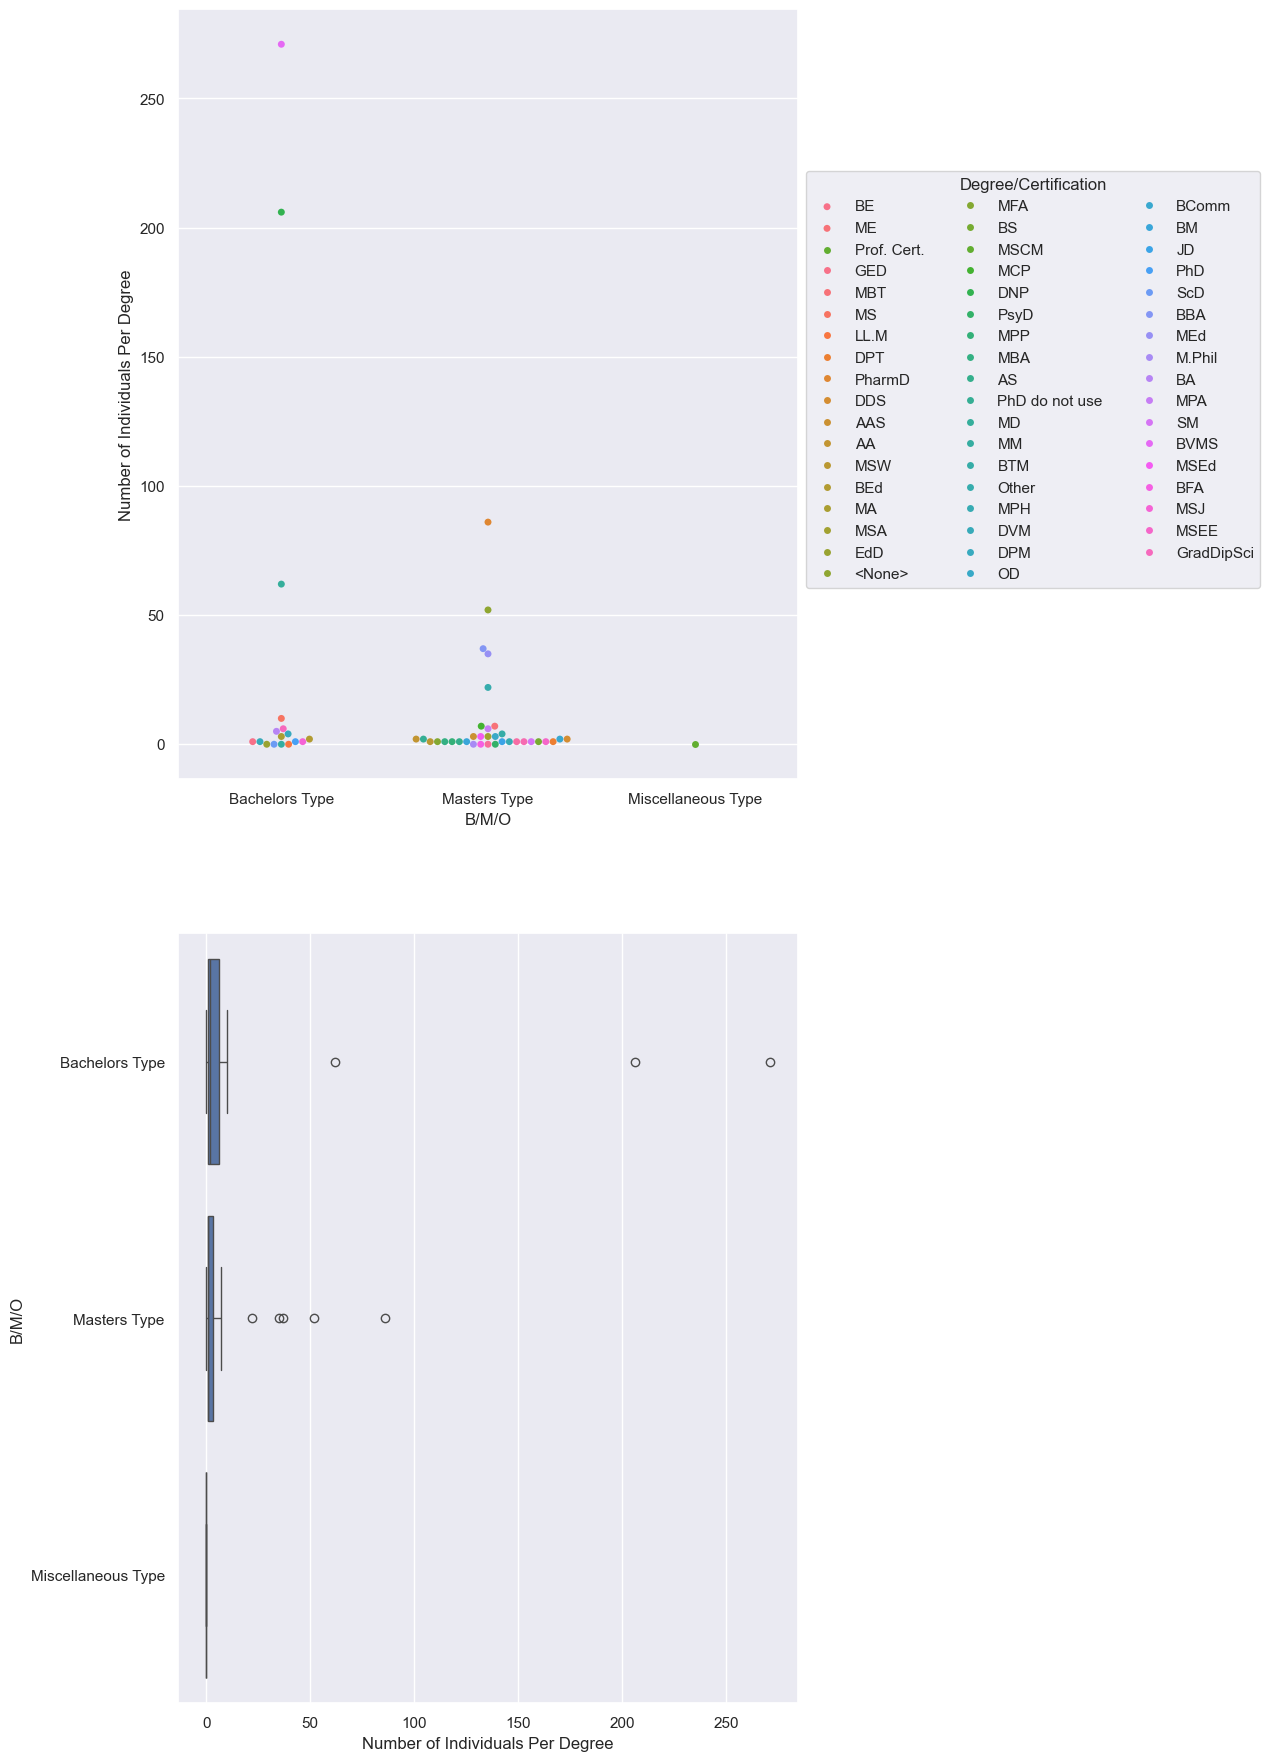

In [88]:
# Number of Individuals Per Degree as a Function of B/M/O
sns.set_theme()

fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(8, 22))

# Swarmplot
sns.swarmplot(data=temp_df, x="B/M/O", y="Number of Individuals Per Degree", hue="Degree/Certification", ax = axes[0])

axes[0].legend_.remove()
axes[0].legend(title = "Degree/Certification", labels = [_ for _ in degree_list], ncols=3, bbox_to_anchor=(1, 0.8))

# Boxplot
sns.boxplot(temp_df, x = "Number of Individuals Per Degree", y = "B/M/O", ax = axes[1])

Text(0.5, 1.0, 'Breakdown of Number of Individuals Per B/M/O Type')

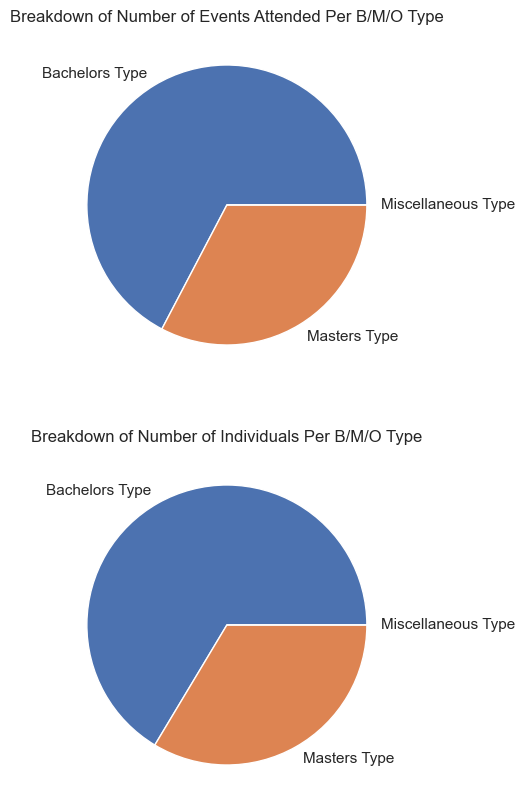

In [114]:
# Pie Charts

# Preparation
temp_temp_df = pd.DataFrame({"B/M/O": ["Bachelors Type", "Masters Type", "Miscellaneous Type"], "Number of Events Attended Per Degree": [0 for _ in range(3)], "Number of Individuals Per Degree": [0 for _ in range(3)]})
temp_temp_df["Number of Events Attended Per Degree"] = temp_temp_df["Number of Events Attended Per Degree"].astype("int")
temp_temp_df["Number of Individuals Per Degree"] = temp_temp_df["Number of Individuals Per Degree"].astype("int")

bachelor_list = ['AAS', 'BA','BTM', 'AA', 'BE','BS','GED','Prof. Cert.','BEd','BComm','Other','BBA','AS','BVMS','BFA','BM',]
master_list = ['DPM', 'PhD', 'EdD', 'MPA', 'ScD', 'SM','MA','MCP','MSCM', 'MS', 'MBA', 'DPT', 'MBT', 'MSA', 'M.Phil', 'MPH','MFA','MD','MPP','DNP','PsyD','PharmD','LL.M','JD','ME','MM','MSEd','MEd','MSW','GradDipSci','OD','DVM','DDS','MSJ','MSEE',]

def pie_chart_creator(row_location : int, str_location : str, main_df : pd.DataFrame = temp_df, edit_df : pd.DataFrame = temp_temp_df) -> None:
    '''
    Inputs:
        row_location - Index of the column you'd like to pull from in the main_df.
        str_location - Index of the column you'd like to add information into in the edit_df.
        main_df - Since we want to display the counts based upon whether somebody falls into the Bachelors Type, Masters Type, or Miscellaneous Type (O), we need to first group degrees along these lines. The main_df is the DataFrame which contains the individual degree information which we subsequently want to group. By default, we use temp_df.
        edit_df - This is the DataFrame that you want to push your collated information into; this is the DataFrame that will directly be used to create your pie chart. By default, we use temp_temp_df.
    '''
 
    bachelor_counter = 0
    master_counter = 0
    miscellaneous_counter = 0
    for _, row in temp_df.iterrows():
        get_degree = str(row.iloc[1])
        if any(degree in get_degree for degree in bachelor_list):
            bachelor_counter += int(row.iloc[row_location])
        elif any(degree in get_degree for degree in master_list):
            master_counter += int(row.iloc[row_location])
        else:
            master_counter += int(row.iloc[row_location])
    
    working_list = [bachelor_counter, master_counter, miscellaneous_counter]
    for row in range(len(temp_temp_df)):
        temp_temp_df.loc[row, str_location] = working_list[row]
    
    del working_list, bachelor_counter, master_counter, miscellaneous_counter

pie_chart_creator(2, str_location = "Number of Events Attended Per Degree")
pie_chart_creator(3, str_location = "Number of Individuals Per Degree")

# Plotting
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(5,10))
axes[0].pie(temp_temp_df.loc[:, "Number of Events Attended Per Degree"].to_list(), labels=temp_temp_df.loc[:, "B/M/O"].to_list())
axes[0].set_title("Breakdown of Number of Events Attended Per B/M/O Type")

axes[1].pie(temp_temp_df.loc[:, "Number of Individuals Per Degree"].to_list(), labels=temp_temp_df.loc[:, "B/M/O"].to_list());
axes[1].set_title("Breakdown of Number of Individuals Per B/M/O Type")

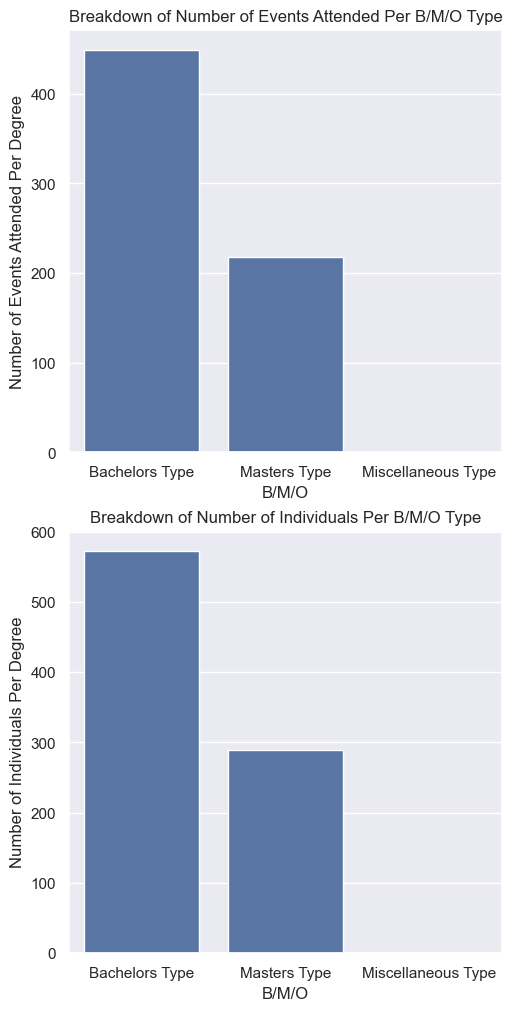

In [118]:
# Bar Plots
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(5,10), constrained_layout = True)

sns.barplot(data=temp_temp_df, x="B/M/O", y="Number of Events Attended Per Degree", ax = axes[0])
axes[0].set_title("Breakdown of Number of Events Attended Per B/M/O Type")

sns.barplot(data=temp_temp_df, x="B/M/O", y="Number of Individuals Per Degree", ax = axes[1])
axes[1].set_title("Breakdown of Number of Individuals Per B/M/O Type")

del temp_temp_df

## Conclusions